https://medium.com/deep-math-machine-learning-ai/chapter-9-natural-language-processing-14bbeb8edc79

NLP is a big area, probably bigger than Machine learning cause the concept of language is really intense so we are not gonna focus on it completely but we focus on the small area where it meets machine learning and deep learning

### Natural language processing

The main goal here is , we wanna make the computer understand the language as we do and we wanna make the computer respond as we do.


### Importing the standard libraries


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset


In [46]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [86]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


We choose the delimiter by 'Tab' and ignore the quotes ' and ".


### Cleaning the texts


In [47]:
import re  #regular expression
import nltk
#nltk.download('stopwords') #download the top non-significant words 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer #for stemming

In [48]:
corpus = []

In [49]:
for i in range(0,df.shape[0]):
    #Removing all except a-z, A-Z letters and replace by space:
    review = re.sub('[^a-zA-Z]',' ', df['Review'][i])
    #Making all letters to lower case:
    review = review.lower()
    #Split the review to the list of words 
    # (could use nltk.tokenize.word_tokenize): 
    review = review.split() 
    #Remove Stopwords__ (the, a, an, on, and, in...) 
    #and Stemming (derive the root of the word):
    ps = PorterStemmer() 
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] 
    #Joining the word list to a sentence (seperate by  space):
    review = ' '.join(review)
    corpus.append(review)

### Creating the Bag of Words model


In [51]:
from sklearn.feature_extraction.text import CountVectorizer 

In [52]:
cv = CountVectorizer(max_features = 1500)

(<code>max_feature</code> for filtering the non-relevant words, 
only take  the 1500 most frequent words)

Creating the sparse matrix  with each columne presenting one word:         

In [53]:
X =  cv.fit_transform(corpus).toarray() #toarray: make X be a matrix 

Creating the dependent vector:

In [40]:
y = df.iloc[:,1].values   

### Split data into train and test sets

In [41]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)


### Feature Scaling

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
sc_X = StandardScaler()

In [64]:
X_train = sc_X.fit_transform(X_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [65]:
X_test = sc_X.fit_transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Fitting Decision Tree to the Training set


In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [68]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### Predicting the Test set results


In [70]:
y_pred = classifier.predict(X_test)

### Making the Confusion Matrix


In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [97]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[75, 22],
       [41, 62]])

Calculating accuracy, precision, recall, F1-score:

In [83]:
accuracy = (cm[0,0]+cm[1,1])/np.sum(cm)
precision = cm[1,1]/np.sum(cm[:,1])
recall = cm[1,1]/np.sum(cm[1,:])
f1_Score =2*precision*recall/(precision+recall)

In [84]:
print('Accuracy =', accuracy)
print('Precision =', precision)
print('Recall = ',recall)
print('F1_Score =', f1_Score)

Accuracy = 0.685
Precision = 0.7380952380952381
Recall =  0.6019417475728155
F1_Score = 0.6631016042780749


In [82]:
print('Accuracy Score :',accuracy_score(y_test, y_pred) )
print('Report : ')
print(classification_report(y_test, y_pred))

Accuracy Score : 0.685
Report : 
             precision    recall  f1-score   support

          0       0.65      0.77      0.70        97
          1       0.74      0.60      0.66       103

avg / total       0.69      0.69      0.68       200



### Visualizing the data


In [85]:
from wordcloud import WordCloud

In [89]:
def visualize(label):
    words = ''
    for msg in df[df['Liked'] == label]['Review']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


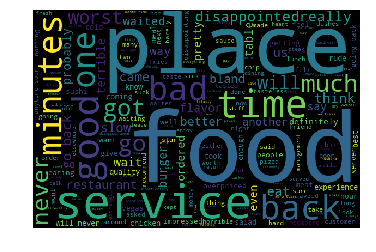

In [90]:
visualize(0)

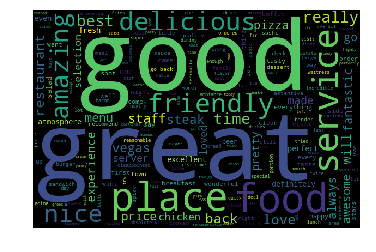

In [91]:
visualize(1)

### See what we're getting wrong:


In [92]:
df['predictions'] = classifier.predict(X)

Reviews that should be Liked (1)

In [93]:
missed_liked = df[(df['predictions'] == 0) & (df['Liked'] == 1)]['Review']
for msg in missed_liked:
  print(msg)


Wow... Loved this place.
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
The selection on the menu was great and so were the prices.
The fries were great too.
A great touch.
Service was very prompt.
I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!
Highly recommended.
The food, amazing.
Service is also cute.
I could care less... The interior is just beautiful.
So they performed.
That's right....the red velvet cake.....ohhh this stuff is so good.
This hole in the wall has great Mexican street tacos, and friendly staff.
Also there are combos like a burger, fries, and beer for 23 which is a decent deal.
I found this place by accident and I could not be happier.
Overall, I like this place a lot.
The only redeeming quality of the restaurant was that it was very inexpensive.
Ample portions and good prices.
My first visit to Hiro was a delight!
The shrimp tender and moist.
On a positive note, our server was very attentive and provided great s

Reviews that should not be Liked

In [95]:
not_liked = df[(df['predictions'] == 1) & (df['Liked'] == 0)]['Review']
for msg in not_liked:
  print(msg)


I will never go back to this place and will never ever recommended this place to anyone!


In [100]:
df[df['predictions']==1]

,Review,Liked,predictions
69,A great way to finish a great.,1,1
166,This place is hands-down one of the best place...,1,1
368,"The staff are great, the ambiance is great.",1,1
537,"Great steak, great sides, great wine, amazing ...",1,1
550,"I really do recommend this place, you can go w...",1,1
565,I will never go back to this place and will ne...,0,1
585,Great food and great service in a clean and fr...,1,1
603,"Good value, great food, great service.",1,1
795,So good I am going to have to review this plac...,1,1
